In [26]:
import sys
import os
from pathlib import Path
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import importlib

sys.path.append(os.path.abspath(".."))

import src.models.xgb.xgb_cv_trainer as cv
import src.utils.optuna_visualizer as opv

In [21]:
# データの読み込み
env_path = Path.cwd().parent / ".env"
load_dotenv(dotenv_path=env_path)
url = os.environ.get("OPTUNA_STORAGE_URL")

tr_df1 = pd.read_csv("../artifacts/features/tr_df1.csv")
test_df1 = pd.read_csv("../artifacts/features/test_df1.csv")

[I 2025-07-18 17:12:10,450] A new study created in memory with name: no-name-36867f17-b794-40f7-88d2-e2c71441dea8


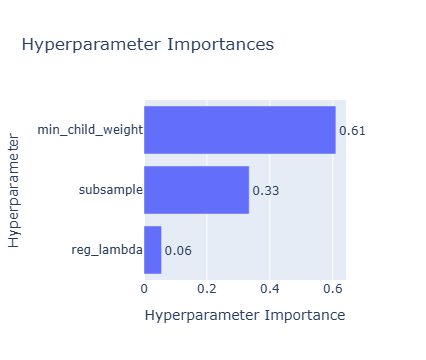

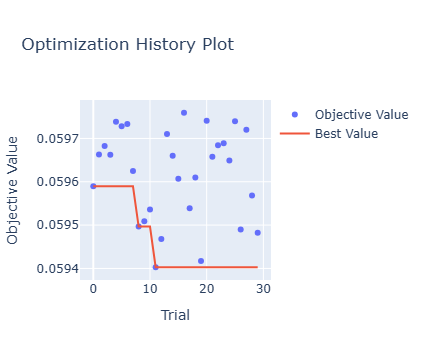

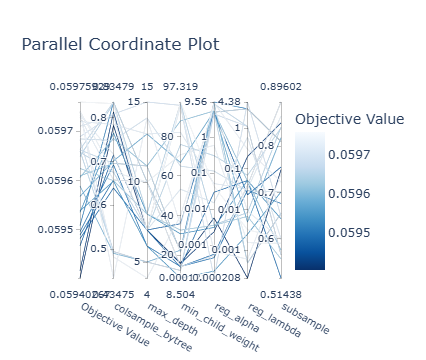

=== Trial 91 ===
CV Score       : 0.05940
Best Iteration : 1545
Params:
params = {
    "max_depth": 7,
    "min_child_weight": 16.00756065488732,
    "colsample_bytree": 0.7815517129377967,
    "subsample": 0.7493192507310231,
    "reg_alpha": 0.005676757667844533,
    "reg_lambda": 0.00020786996906897802
}
=== Trial 108 ===
CV Score       : 0.05942
Best Iteration : 1934
Params:
params = {
    "max_depth": 7,
    "min_child_weight": 15.779984517855961,
    "colsample_bytree": 0.8123468091392814,
    "subsample": 0.8509357413523924,
    "reg_alpha": 0.0023300020635091075,
    "reg_lambda": 0.19948958651882567
}
=== Trial 92 ===
CV Score       : 0.05947
Best Iteration : 4399
Params:
params = {
    "max_depth": 7,
    "min_child_weight": 35.89241559254097,
    "colsample_bytree": 0.714803089169032,
    "subsample": 0.7550229885420853,
    "reg_alpha": 5.048255893197846,
    "reg_lambda": 0.022965432344634346
}
=== Trial 125 ===
CV Score       : 0.05948
Best Iteration : 2148
Params:
params

,study_name,n_trials,best_score,direction,datetime_start
0,lgb_v1,20,0.097196,MAXIMIZE,2025-07-17 03:49:00
1,lgb_v1.1,61,0.060546,MINIMIZE,2025-07-17 03:53:51
2,xgb_v1,128,0.059403,MINIMIZE,2025-07-17 04:23:05


In [17]:
# xgb_v1の確認
importlib.reload(opv)
study_name = "xgb_v1"

study = opv.OptunaVisualizer(study_name, url)
study.visualize_optimization()
study.print_trials_table()
study.summarize_studies()

In [24]:
# ID1のoof作成
params = {
    "learning_rate": 0.02,
    "max_depth": 7,
    "min_child_weight": 16.00756065488732,
    "colsample_bytree": 0.7815517129377967,
    "subsample": 0.7493192507310231,
    "reg_alpha": 0.005676757667844533,
    "reg_lambda": 0.00020786996906897802
}

trainer = cv.XGBCVTrainer(
    params=params,
    early_stopping_rounds=500
)
oof, test_preds = trainer.fit(tr_df1, test_df1)
np.save("../artifacts/oof/single/oof_single_1.npy", oof)
np.save("../artifacts/test_preds/single/test_single_1.npy", test_preds)


Fold 1
[0]	train-rmse:0.94458	eval-rmse:0.94374
[100]	train-rmse:0.15194	eval-rmse:0.15159
[200]	train-rmse:0.06734	eval-rmse:0.06734
[300]	train-rmse:0.06102	eval-rmse:0.06140
[400]	train-rmse:0.05969	eval-rmse:0.06034
[500]	train-rmse:0.05908	eval-rmse:0.05994
[600]	train-rmse:0.05867	eval-rmse:0.05973
[700]	train-rmse:0.05838	eval-rmse:0.05961
[800]	train-rmse:0.05816	eval-rmse:0.05955
[900]	train-rmse:0.05794	eval-rmse:0.05950
[1000]	train-rmse:0.05778	eval-rmse:0.05947
[1100]	train-rmse:0.05760	eval-rmse:0.05945
[1200]	train-rmse:0.05745	eval-rmse:0.05944
[1300]	train-rmse:0.05729	eval-rmse:0.05942
[1400]	train-rmse:0.05714	eval-rmse:0.05941
[1500]	train-rmse:0.05701	eval-rmse:0.05941
[1600]	train-rmse:0.05687	eval-rmse:0.05941
[1700]	train-rmse:0.05675	eval-rmse:0.05941
[1800]	train-rmse:0.05663	eval-rmse:0.05941
[1900]	train-rmse:0.05651	eval-rmse:0.05941
[2000]	train-rmse:0.05638	eval-rmse:0.05942
[2044]	train-rmse:0.05633	eval-rmse:0.05942
Training time: 00:00:11
Train rmse: 

In [29]:
# ID2のoof作成
params = {
    "learning_rate": 0.02,
    "max_depth": 7,
    "min_child_weight": 15.779984517855961,
    "colsample_bytree": 0.8123468091392814,
    "subsample": 0.8509357413523924,
    "reg_alpha": 0.0023300020635091075,
    "reg_lambda": 0.19948958651882567
}

trainer = cv.XGBCVTrainer(
    params=params,
    early_stopping_rounds=500
)
oof, test_preds = trainer.fit(tr_df1, test_df1)
np.save("../artifacts/oof/single/oof_single_2.npy", oof)
np.save("../artifacts/test_preds/single/test_single_2.npy", test_preds)


Fold 1
[0]	train-rmse:0.94459	eval-rmse:0.94374
[100]	train-rmse:0.15194	eval-rmse:0.15160
[200]	train-rmse:0.06732	eval-rmse:0.06736
[300]	train-rmse:0.06095	eval-rmse:0.06139
[400]	train-rmse:0.05957	eval-rmse:0.06030
[500]	train-rmse:0.05895	eval-rmse:0.05993
[600]	train-rmse:0.05851	eval-rmse:0.05973
[700]	train-rmse:0.05820	eval-rmse:0.05962
[800]	train-rmse:0.05797	eval-rmse:0.05957
[900]	train-rmse:0.05776	eval-rmse:0.05952
[1000]	train-rmse:0.05756	eval-rmse:0.05949
[1100]	train-rmse:0.05739	eval-rmse:0.05948
[1200]	train-rmse:0.05722	eval-rmse:0.05946
[1300]	train-rmse:0.05707	eval-rmse:0.05945
[1400]	train-rmse:0.05692	eval-rmse:0.05943
[1500]	train-rmse:0.05678	eval-rmse:0.05943
[1600]	train-rmse:0.05664	eval-rmse:0.05943
[1700]	train-rmse:0.05650	eval-rmse:0.05943
[1800]	train-rmse:0.05637	eval-rmse:0.05943
[1900]	train-rmse:0.05625	eval-rmse:0.05942
[2000]	train-rmse:0.05613	eval-rmse:0.05942
[2100]	train-rmse:0.05601	eval-rmse:0.05943
[2200]	train-rmse:0.05589	eval-rmse:

In [30]:
# ID3のoof作成
params = {
    "learning_rate": 0.02,
    "max_depth": 7,
    "min_child_weight": 35.89241559254097,
    "colsample_bytree": 0.714803089169032,
    "subsample": 0.7550229885420853,
    "reg_alpha": 5.048255893197846,
    "reg_lambda": 0.022965432344634346
}

trainer = cv.XGBCVTrainer(
    params=params,
    early_stopping_rounds=500
)
oof, test_preds = trainer.fit(tr_df1, test_df1)
np.save("../artifacts/oof/single/oof_single_3.npy", oof)
np.save("../artifacts/test_preds/single/test_single_3.npy", test_preds)


Fold 1
[0]	train-rmse:0.94461	eval-rmse:0.94377
[100]	train-rmse:0.15339	eval-rmse:0.15303
[200]	train-rmse:0.06876	eval-rmse:0.06842
[300]	train-rmse:0.06238	eval-rmse:0.06218
[400]	train-rmse:0.06112	eval-rmse:0.06106
[500]	train-rmse:0.06054	eval-rmse:0.06056
[600]	train-rmse:0.06018	eval-rmse:0.06029
[700]	train-rmse:0.05992	eval-rmse:0.06011
[800]	train-rmse:0.05976	eval-rmse:0.06001
[900]	train-rmse:0.05961	eval-rmse:0.05992
[1000]	train-rmse:0.05948	eval-rmse:0.05984
[1100]	train-rmse:0.05937	eval-rmse:0.05979
[1200]	train-rmse:0.05927	eval-rmse:0.05974
[1300]	train-rmse:0.05918	eval-rmse:0.05971
[1400]	train-rmse:0.05909	eval-rmse:0.05968
[1500]	train-rmse:0.05902	eval-rmse:0.05966
[1600]	train-rmse:0.05895	eval-rmse:0.05964
[1700]	train-rmse:0.05890	eval-rmse:0.05962
[1800]	train-rmse:0.05883	eval-rmse:0.05961
[1900]	train-rmse:0.05878	eval-rmse:0.05959
[2000]	train-rmse:0.05873	eval-rmse:0.05958
[2100]	train-rmse:0.05867	eval-rmse:0.05956
[2200]	train-rmse:0.05863	eval-rmse: